<a href="https://colab.research.google.com/github/akash-ranjan8/RECOGNIZING_HANDWRITTEN_DIGITS_IN_PYTHON/blob/master/Recognizing_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RECOGNIZING THE HANDWRITTEN DIGITS

#IMPORTING THE LIBRARIES

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#EXTRACTING THE DATA 

In [3]:
mnist = fetch_openml("mnist_784")

#PLOTTING THE DATASET DIGITS

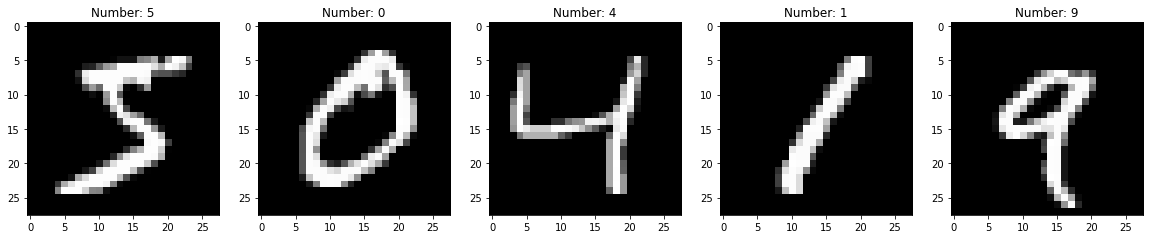

In [4]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(mnist.data[:5],mnist.target[:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(28,28)),cmap="gray")
    plt.title("Number: %s" % label)

#SPLITTING THE DATASET

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(mnist.data,mnist.target,test_size=0.2)

#APPLYING THE LOGISTIC REGRESSION ON THE TRAINING SET

In [6]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(X_train,Y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test,Y_test)
print(score)

0.9228571428571428


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#PREDICTIONS OF DIGITS

Prediction: 5


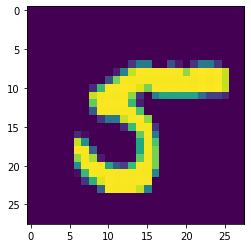

In [7]:
index=1
plt.imshow(np.reshape(X_test[index],(28,28)))
print("Prediction: "+mdl.predict([X_test[index]])[0])

Prediction: 0


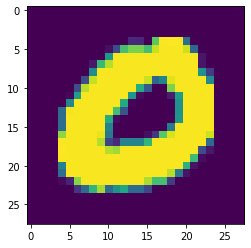

In [8]:
index=2
plt.imshow(np.reshape(X_test[index],(28,28)))
print("Prediction: "+mdl.predict([X_test[index]])[0])

Prediction: 8


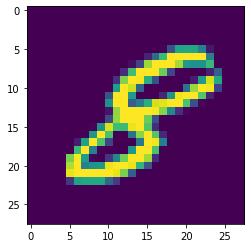

In [10]:
index=4
plt.imshow(np.reshape(X_test[index],(28,28)))
print("Prediction: "+mdl.predict([X_test[index]])[0])

Prediction: 1


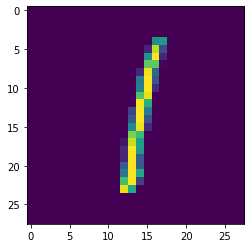

In [11]:
index=7
plt.imshow(np.reshape(X_test[index],(28,28)))
print("Prediction: "+mdl.predict([X_test[index]])[0])

Prediction: 9


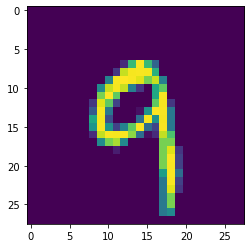

In [15]:
index=13
plt.imshow(np.reshape(X_test[index],(28,28)))
print("Prediction: "+mdl.predict([X_test[index]])[0])

#MAKING CONFUSION MATRIX

In [16]:
cm = metrics.confusion_matrix(Y_test,predictions)
print(cm)

[[1319    0    2    2    2    7   12    2   12    1]
 [   0 1495    6    3    1    2    1    1   14    2]
 [   8   13 1294   18   25    4   23   19   33   10]
 [   4    4   41 1274    1   41    4   20   30   19]
 [   5    6    7    2 1267    1    8    8   13   43]
 [  13    2    6   51   15 1072   30    5   48   12]
 [   6    4    6    0    8   12 1368    3    5    0]
 [   0    7   13    8    6    1    1 1370    4   46]
 [   9   17   15   41    5   28    8    7 1236   12]
 [  13    5    4   15   47    7    3   40   12 1225]]


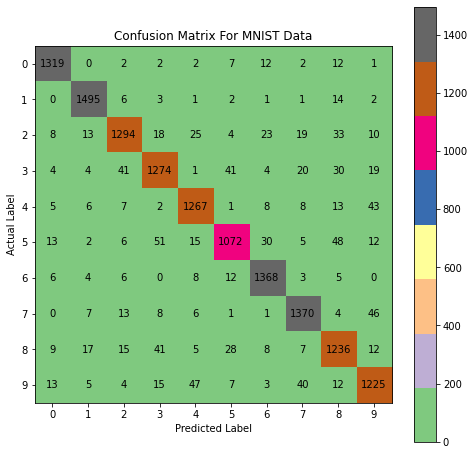

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(cm,cmap='Accent')
plt.title('Confusion Matrix For MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.colorbar()

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),horizontalalignment="center",verticalalignment="center")